In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 30

In [302]:
df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [303]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201903,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Enplaned,Other,International,A,6995
1,201903,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,12172
2,201903,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,11496
3,201903,United Airlines,UA,United Airlines,UA,International,Middle East,Enplaned,Other,International,G,7473
4,201903,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G,6857


In [304]:
df.groupby('Terminal').sum()['Passenger Count']

Terminal
International    162754209
Other                  200
Terminal 1       139649684
Terminal 2        61338607
Terminal 3       242822759
Name: Passenger Count, dtype: int64

In [305]:
df.shape

(20256, 12)

In [306]:
# Dropping nulls that I found in columns - only a few
df.dropna(inplace = True)

In [307]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

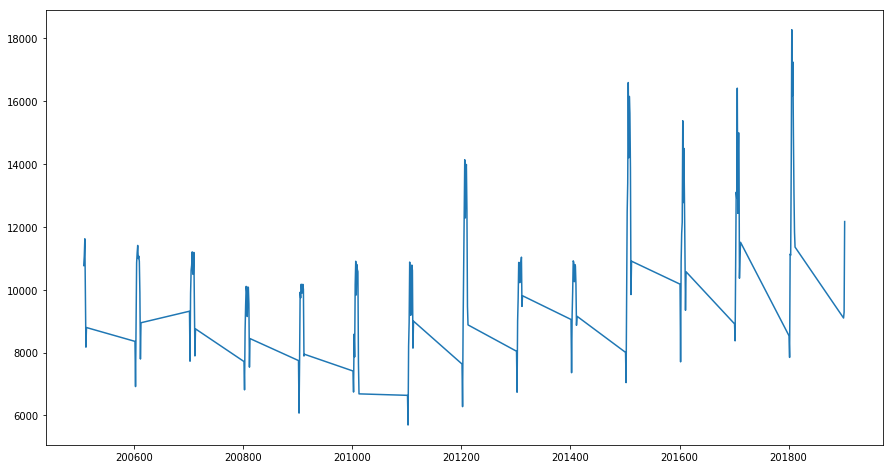

In [308]:
# Plotting one airline's flights against time to see how the time series look

df_explore_virgin = df[(df['Operating Airline'] == 'Virgin Atlantic')  & (df['Activity Type Code'] == 'Enplaned')]

# Plot of passengers leaving SFO on Virgin Atlantic
plt.figure(figsize = (15,8))
plt.plot(df_explore_virgin['Activity Period'], df_explore_virgin['Passenger Count']);

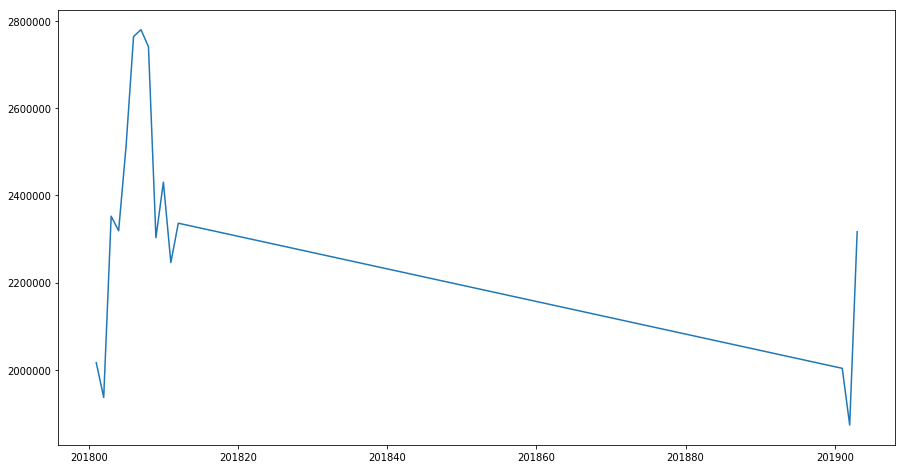

In [309]:
df_explore = df[df['Activity Type Code'] == 'Enplaned'].groupby('Activity Period').sum()

df_explore = df_explore[df_explore.index >= 201800]

# Zoomed-in version shows that it is interpreting the difference between "201812" and "201901" incorrectly
plt.figure(figsize = (15,8))
plt.plot(df_explore.index, df_explore['Passenger Count']);

# Data Cleaning

In [310]:
df['date'] = pd.to_datetime(df['Activity Period'], format = '%Y%m')

In [312]:
# Eliminating rows that account for passengers in layovers. Don't care about those
df.set_index('Activity Type Code', inplace = True)
df.drop(index = 'Thru / Transit', inplace = True)

In [313]:
# Changing the index to dates so that I can use time-series unique functions like pd.resample()
df.reset_index(inplace = True)
df.set_index('date', inplace = True)

# Dropping the no longer useful column that we derived dates from
df.drop(columns = 'Activity Period', inplace = True)

## Next up: I need to group by the proper types so I can get "enplaned" and "deplaned" trends, and conduct separate time series analysis on them

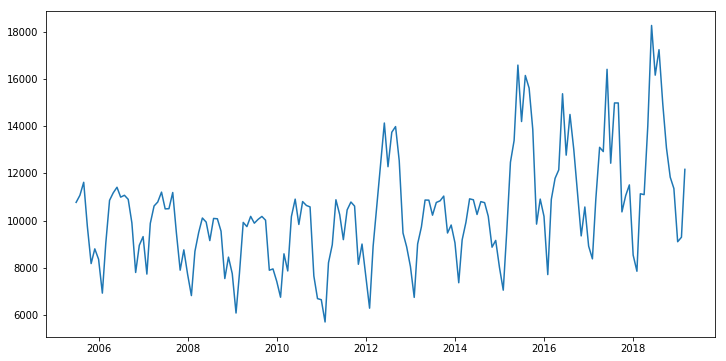

In [314]:
df_explore_virgin = df[(df['Operating Airline'] == 'Virgin Atlantic')  & (df['Activity Type Code'] == 'Enplaned')]

# Improved plot of Virgin Atlantic after datetime was fixed
plt.figure(figsize = (12,6))
plt.plot(df_explore_virgin.index, df_explore_virgin['Passenger Count']);

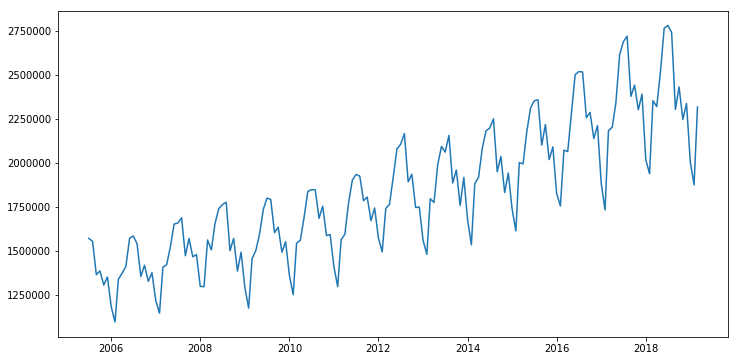

In [315]:
df_explore = df[df['Activity Type Code'] == 'Enplaned'].groupby('date').sum()

# Improved plot of total air traffic after datetime was fixed

plt.figure(figsize = (12,6))
plt.plot(df_explore.index, df_explore['Passenger Count']);

### I will choose to not use moving averages for the above, since my data is on the month level, I do not want to smooth further than the level of the month

I might need to use multiplicative seasonality in this case, since the amplitude of the seasonal trends is increasing with the increase in number of passengers

What is the difference between an "Operating Airline" and a "Published Airline"?

In [316]:
df['Operating Airline'].value_counts()

United Airlines                     1718
United Airlines - Pre 07/01/2013    1577
SkyWest Airlines                    1292
Alaska Airlines                      820
Virgin America                       462
Delta Air Lines                      446
Air Canada                           438
American Airlines                    416
JetBlue Airways                      337
Sun Country Airlines                 335
Frontier Airlines                    332
Air China                            331
Air New Zealand                      331
TACA                                 330
British Airways                      330
                                    ... 
Atlantic Southeast Airlines           22
Ameriflight                           21
Icelandair                            20
Icelandair EHF                        20
BelAir Airlines                       20
Jet Airways                           16
Allegiant Air                         16
Miami Air International               16
Air Canada Jazz 

In [317]:
df['Published Airline'].value_counts()

United Airlines                     2114
United Airlines - Pre 07/01/2013    2068
Alaska Airlines                     1178
Delta Air Lines                      990
American Airlines                    660
Air Canada                           520
Virgin America                       462
US Airways                           407
JetBlue Airways                      337
Sun Country Airlines                 335
Frontier Airlines                    332
Air New Zealand                      331
Air China                            331
TACA                                 330
British Airways                      330
                                    ... 
Finnair                               24
Republic Airlines                     24
Ameriflight                           21
BelAir Airlines                       20
Icelandair                            20
Icelandair EHF                        20
Allegiant Air                         16
Miami Air International               16
Jet Airways     

I will use Operating Airlines since that indicates who is actually flying the flight. The Published Airline is the one who is publishing the flight, and Operating is the one who is actually flying it. I care more about operations in this project than marketing, so I will stay with who operates it

In [318]:
df.groupby([df.index, 'Activity Type Code']).sum()

Passenger Count
date       Activity Type Code                 
2005-07-01 Deplaned                    1627329
           Enplaned                    1569412
2005-08-01 Deplaned                    1614450
           Enplaned                    1553146
2005-09-01 Deplaned                    1353447
           Enplaned                    1363140
2005-10-01 Deplaned                    1358128
           Enplaned                    1384822
2005-11-01 Deplaned                    1291602
           Enplaned                    1304433
2005-12-01 Deplaned                    1297510
           Enplaned                    1350000
2006-01-01 Deplaned                    1243753
           Enplaned                    1182313
2006-02-01 Deplaned                    1104323
...                                        ...
2018-08-01 Enplaned                    2740357
2018-09-01 Deplaned                    2340188
           Enplaned                    2302919
2018-10-01 Deplaned                    2425591
           Enplaned                    2430076
2018-11-01 Deplaned                    2258229
           Enplaned                    2245913
2018-12-01 Deplaned                    2235904
           Enplaned                    2336093
2019-01-01 Deplaned                    2148066
           Enplaned                    2003649
2019-02-01 Deplaned                    1875859
           Enplaned                    1873694
2019-03-01 Deplaned                    2278985
           Enplaned                    2316520

[330 rows x 1 columns]

In [319]:
# gb_month = "grouped by month"
gb_month = df.resample('M').sum()

In [320]:
# Autocorrelation across all airlines is very close to 1
gb_month['Passenger Count'].autocorr(lag = 12)

0.9834914614470184

In [321]:
# Shows that Operating Airline is different from Published Airline ~2000 times: 1/10 of the time in my df
df[df['Operating Airline'] != df['Published Airline']].shape

(2218, 11)

In [322]:
gb_month

,Passenger Count
date,
2005-07-31,3196741
2005-08-31,3167596
2005-09-30,2716587
2005-10-31,2742950
2005-11-30,2596035
2005-12-31,2647510
2006-01-31,2426066
2006-02-28,2198793
2006-03-31,2678826


(0, 60)

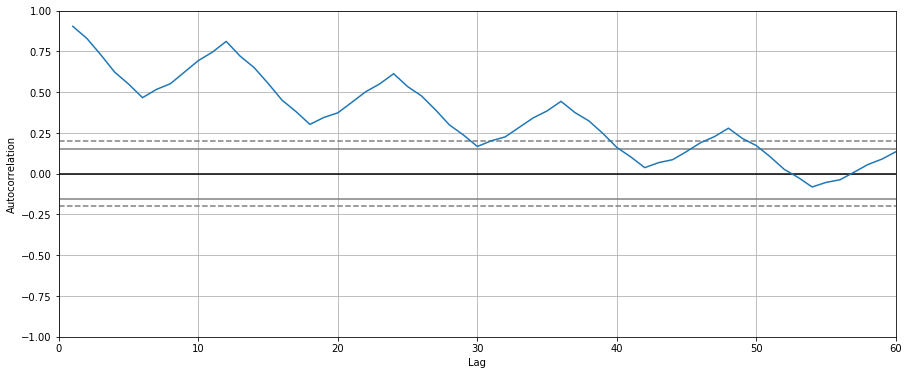

In [323]:
# We definitely have autocorrelation - peaking at the 12 month mark and the 1 month mark
plt.figure(figsize = (15,6))
pd.plotting.autocorrelation_plot(gb_month)
plt.xlim(0,60)

## Differencing

In [324]:
diffs = gb_month.diff(periods=12)

diffs

,Passenger Count
date,
2005-07-31,NaN
2005-08-31,NaN
2005-09-30,NaN
2005-10-31,NaN
2005-11-30,NaN
2005-12-31,NaN
2006-01-31,NaN
2006-02-28,NaN
2006-03-31,NaN


In [325]:
# Subtract each month's passenger count by the previous year's, and drop the first year of nulls (2005-'06)
df['diff'] = gb_month.diff(periods=12)

# NOTE: Dropping data from late 2005 and early 2006 here, in order to keep my differencing
#df.dropna(inplace = True)

df['diff'].value_counts()

Series([], Name: diff, dtype: int64)

In [326]:
df.head()

,Activity Type Code,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Passenger Count,diff
date,,,,,,,,,,,,
2019-03-01,Enplaned,Japan Airlines,JL,Japan Airlines,JL,International,Asia,Other,International,A,6995,NaN
2019-03-01,Enplaned,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Other,International,A,12172,NaN
2019-03-01,Deplaned,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Other,International,A,11496,NaN
2019-03-01,Enplaned,United Airlines,UA,United Airlines,UA,International,Middle East,Other,International,G,7473,NaN
2019-03-01,Deplaned,United Airlines,UA,United Airlines,UA,International,Middle East,Other,International,G,6857,NaN


In [327]:
gb_month[12:17]

,Passenger Count
date,
2006-07-31,3206302
2006-08-31,3122652
2006-09-30,2701881
2006-10-31,2817973
2006-11-30,2636337


**We see from the above that the difference did quite a good job of reducing ~3 million passengers down to differences of only a few ten thousands**

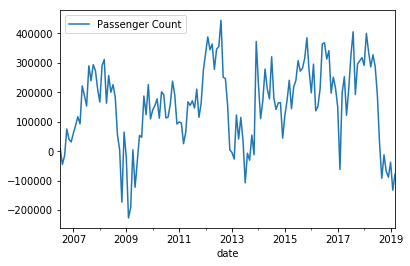

In [328]:
gb_month.diff(periods=12).dropna().plot()